In [30]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [31]:
df = pd.read_excel("D://applications of software//Gdp.xlsx")
df

,States,Years,GSDP - CURRENT PRICES (` in Crore),% Growth over previous year
0,Andhra Pradesh,2011-12,379402.0,NaN
1,Arunachal Pradesh,2011-12,11063.0,NaN
2,Assam,2011-12,143175.0,NaN
3,Bihar,2011-12,247144.0,NaN
4,Chhattisgarh,2011-12,158074.0,NaN
...,...,...,...,...
199,Andaman & Nicobar Islands,2016-17,NaN,NaN
200,Chandigarh,2016-17,NaN,NaN
201,Delhi,2016-17,622385.0,12.76
202,Puducherry,2016-17,29557.0,11.40


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   States                              204 non-null    object 
 1   Years                               204 non-null    object 
 2   GSDP - CURRENT PRICES (` in Crore)  167 non-null    float64
 3   % Growth over previous year         134 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.5+ KB


In [33]:
df.columns

Index(['States', 'Years ', 'GSDP - CURRENT PRICES (` in Crore)',
       '% Growth over previous year'],
      dtype='object')

In [34]:
df_cleaned = df[~((df['Years '] == '2016-17') & 
                  (df['% Growth over previous year'].notna() | df['GSDP - CURRENT PRICES (` in Crore)'].notna()))]


In [35]:
growth_data = df_cleaned[df_cleaned['Years '].isin(['2013-14', '2014-15', '2015-16'])]


In [36]:
avg_growth = growth_data.groupby('States')['% Growth over previous year'].mean().reset_index()
avg_growth.columns = ['States', 'Average Growth']
print(avg_growth)


                       States  Average Growth
0               All_India GDP       11.203333
1   Andaman & Nicobar Islands       13.785000
2             Andhra Pradesh        14.033333
3           Arunachal Pradesh       14.413333
4                       Assam       12.650000
5                       Bihar       13.603333
6                  Chandigarh       11.960000
7                Chhattisgarh       13.703333
8                       Delhi       12.160000
9                         Goa        6.033333
10                    Gujarat       11.126667
11                    Haryana       11.846667
12           Himachal Pradesh       12.280000
13            Jammu & Kashmir       10.900000
14                  Jharkhand       11.500000
15                  Karnataka       14.120000
16                     Kerala       12.583333
17             Madhya Pradesh       12.626667
18                Maharashtra       11.260000
19                    Manipur       14.610000
20                  Meghalaya     

In [37]:
fast_states = avg_growth.sort_values(by='Average Growth', ascending=False).head()
slow_states = avg_growth.sort_values(by='Average Growth').head()
print("Fast-growing states:\n", fast_states)
print("Struggling states:\n", slow_states)


Fast-growing states:
                States  Average Growth
21            Mizoram       17.700000
30            Tripura       17.030000
22           Nagaland       16.415000
19            Manipur       14.610000
3   Arunachal Pradesh       14.413333
Struggling states:
              States  Average Growth
9               Goa        6.033333
20        Meghalaya        6.953333
23           Odisha        9.836667
27           Sikkim       10.486667
13  Jammu & Kashmir       10.900000


In [11]:
national_avg = avg_growth['Average Growth'].mean()
home_state = avg_growth[avg_growth['States'] == 'Your Home State']
print(f"National average growth: {national_avg:.2f}")
print(f"Home state growth: {home_state}")


National average growth: 12.37
Home state growth: Empty DataFrame
Columns: [States, Average Growth]
Index: []


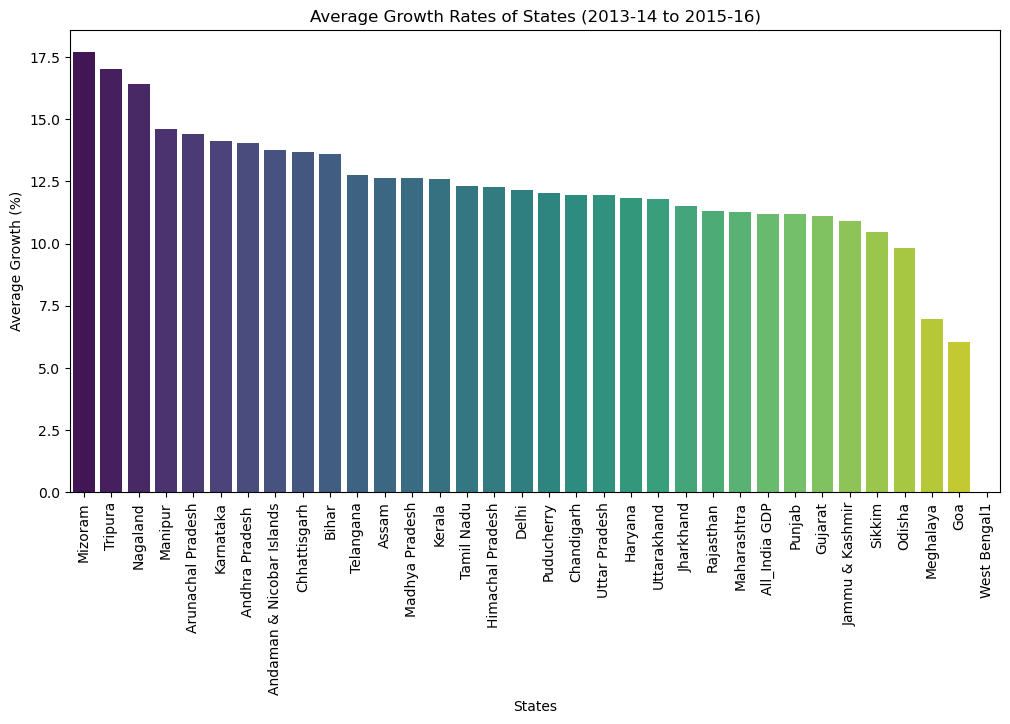

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by Average Growth for better visualization
avg_growth_sorted = avg_growth.sort_values(by='Average Growth', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_growth_sorted, x='States', y='Average Growth', palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Growth Rates of States (2013-14 to 2015-16)')
plt.xlabel('States')
plt.ylabel('Average Growth (%)')
plt.show()


In [14]:
gdp_2015_16 = df_cleaned[(df_cleaned['Years '] == '2015-16')][['States', 'GSDP - CURRENT PRICES (` in Crore)']]
gdp_2015_16.columns = ['States', 'Total GDP']
print(gdp_2015_16)


                        States   Total GDP
136            Andhra Pradesh     609934.0
137          Arunachal Pradesh     18784.0
138                      Assam    224234.0
139                      Bihar    413503.0
140               Chhattisgarh    260776.0
141                        Goa     45002.0
142                    Gujarat    994316.0
143                    Haryana    485184.0
144           Himachal Pradesh         NaN
145            Jammu & Kashmir    118387.0
146                  Jharkhand    241955.0
147                  Karnataka   1027068.0
148                     Kerala    588337.0
149             Madhya Pradesh    543975.0
150                Maharashtra         NaN
151                    Manipur         NaN
152                  Meghalaya     26745.0
153                    Mizoram         NaN
154                   Nagaland         NaN
155                     Odisha    341887.0
156                     Punjab         NaN
157                  Rajasthan         NaN
158        

In [15]:
top_5_gdp = gdp_2015_16.sort_values(by='Total GDP', ascending=False).head()
bottom_5_gdp = gdp_2015_16.sort_values(by='Total GDP').head()
print("Top 5 states by GDP:\n", top_5_gdp)
print("Bottom 5 states by GDP:\n", bottom_5_gdp)


Top 5 states by GDP:
             States   Total GDP
169  All_India GDP  13675331.0
159     Tamil Nadu   1212668.0
162  Uttar Pradesh   1153795.0
147      Karnataka   1027068.0
142        Gujarat    994316.0
Bottom 5 states by GDP:
                 States  Total GDP
158             Sikkim    16637.0
137  Arunachal Pradesh    18784.0
168         Puducherry    26533.0
152          Meghalaya    26745.0
166         Chandigarh    30304.0


In [17]:
# Exclude "All_India GDP" from the dataset
gdp_filtered = gdp_2015_16[gdp_2015_16['States'] != 'All_India GDP']

# Top 5 states by GDP (excluding "All_India GDP")
top_5_gdp = gdp_filtered.sort_values(by='Total GDP', ascending=False).head(5)
print("Top 5 states by GDP (excluding All_India GDP):\n", top_5_gdp)

# Bottom 5 states by GDP
bottom_5_gdp = gdp_filtered.sort_values(by='Total GDP').head(5)
print("Bottom 5 states by GDP:\n", bottom_5_gdp)


Top 5 states by GDP (excluding All_India GDP):
               States  Total GDP
159       Tamil Nadu  1212668.0
162    Uttar Pradesh  1153795.0
147        Karnataka  1027068.0
142          Gujarat   994316.0
136  Andhra Pradesh    609934.0
Bottom 5 states by GDP:
                 States  Total GDP
158             Sikkim    16637.0
137  Arunachal Pradesh    18784.0
168         Puducherry    26533.0
152          Meghalaya    26745.0
166         Chandigarh    30304.0


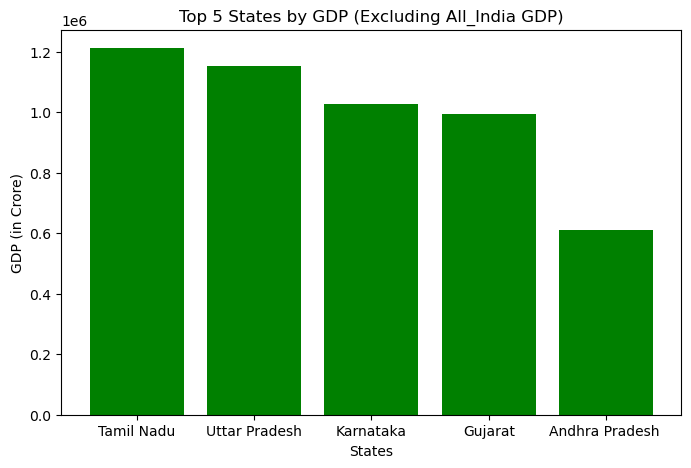

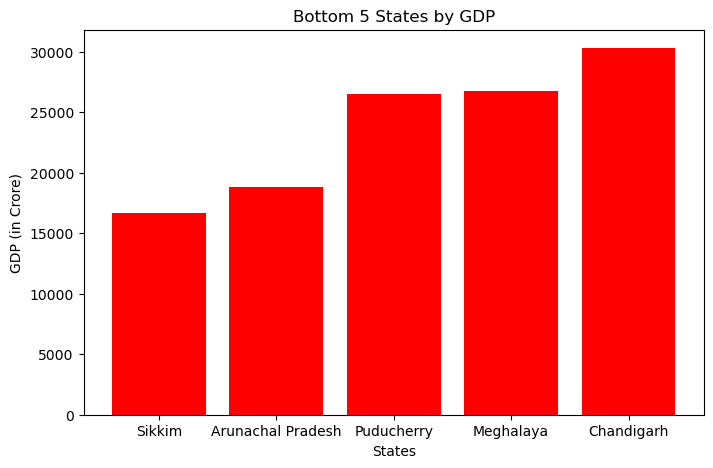

In [18]:
import matplotlib.pyplot as plt

# Plot top 5 states by GDP
plt.figure(figsize=(8, 5))
plt.bar(top_5_gdp['States'], top_5_gdp['Total GDP'], color='green')
plt.title('Top 5 States by GDP (Excluding All_India GDP)')
plt.xlabel('States')
plt.ylabel('GDP (in Crore)')
plt.show()

# Plot bottom 5 states by GDP
plt.figure(figsize=(8, 5))
plt.bar(bottom_5_gdp['States'], bottom_5_gdp['Total GDP'], color='red')
plt.title('Bottom 5 States by GDP')
plt.xlabel('States')
plt.ylabel('GDP (in Crore)')
plt.show()


### PART- 1 - B


In [21]:
pip install pandas openpyxl

In [38]:
import pandas as pd
import os

# Path to the folder containing the CSV files
folder_path = "D://applications of software"

# List to store individual dataframes
dfs = []

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file_name)
        try:
            # Try reading the CSV file with UTF-8 encoding
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            # If UTF-8 fails, use a fallback encoding
            df = pd.read_csv(file_path, encoding='latin1')
        dfs.append(df)

# Concatenate all dataframes into a single dataframe
final_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the final dataframe
print(final_df.head())

# Optionally, save the combined dataframe to a new CSV file
final_df.to_csv("D://applications of software//Gdp.xlsx", index=False)

ValueError: No objects to concatenate

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path if necessary)
file_path = "C://Users//kiran//OneDrive//Documents//Gdp.xlsx"

# Load the data from the sheet (assuming all data is in the first sheet)
df = pd.read_excel("C://Users//kiran//OneDrive//Documents//Gdp.xlsx")

# Check the column names to identify relevant data
print(df.columns)

# Assuming the columns for GDP per capita and dropout rates are like:
# 'Per Capita GSDP (Rs.)', 'Primary Dropout', 'Upper Primary Dropout', 'Secondary Dropout'

# Drop rows with missing data in 'Per Capita GSDP (Rs.)' and dropout rates columns
df_cleaned = df.dropna(subset=['Per Capita GSDP (Rs.)', 'Primary Dropout', 'Upper Primary Dropout', 'Secondary Dropout'])

# Calculate the correlation between Per Capita GSDP and dropout rates (for each education level)
correlation_matrix = df_cleaned[['Per Capita GSDP (Rs.)', 'Primary Dropout', 'Upper Primary Dropout', 'Secondary Dropout']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix: Per Capita GSDP vs. Dropout Rates')
plt.show()

# Scatter plots to visualize the relationship
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Primary education dropout vs GDP per capita
sns.scatterplot(x='Per Capita GSDP (Rs.)', y='Primary Dropout', data=df_cleaned, ax=axes[0])
axes[0].set_title('Primary Education Dropout vs GDP per Capita')

# Upper primary education dropout vs GDP per capita
sns.scatterplot(x='Per Capita GSDP (Rs.)', y='Upper Primary Dropout', data=df_cleaned, ax=axes[1])
axes[1].set_title('Upper Primary Education Dropout vs GDP per Capita')

# Secondary education dropout vs GDP per capita
sns.scatterplot(x='Per Capita GSDP (Rs.)', y='Secondary Dropout', data=df_cleaned, ax=axes[2])
axes[2].set_title('Secondary Education Dropout vs GDP per Capita')

plt.tight_layout()
plt.show()


Index(['States', 'Years ', 'GSDP - CURRENT PRICES (` in Crore)',
       '% Growth over previous year'],
      dtype='object')


KeyError: ['Per Capita GSDP (Rs.)', 'Primary Dropout', 'Upper Primary Dropout', 'Secondary Dropout']

In [20]:
# Clean the data by removing rows with missing values in relevant columns
df_cleaned = df.dropna(subset=['GSDP - CURRENT PRICES (` in Crore)', '% Growth over previous year'])

# Convert GSDP and Growth columns to numeric values (if necessary)
df_cleaned['GSDP - CURRENT PRICES (` in Crore)'] = pd.to_numeric(df_cleaned['GSDP - CURRENT PRICES (` in Crore)'], errors='coerce')
df_cleaned['% Growth over previous year'] = pd.to_numeric(df_cleaned['% Growth over previous year'], errors='coerce')

# Calculate correlation between GSDP and % Growth
correlation_matrix = df_cleaned[['GSDP - CURRENT PRICES (` in Crore)', '% Growth over previous year']].corr()

# Display the correlation matrix
print(correlation_matrix)


                                    GSDP - CURRENT PRICES (` in Crore)  \
GSDP - CURRENT PRICES (` in Crore)                            1.000000   
% Growth over previous year                                  -0.023817   

                                    % Growth over previous year  
GSDP - CURRENT PRICES (` in Crore)                    -0.023817  
% Growth over previous year                            1.000000  


C:\Users\kiran\AppData\Local\Temp\ipykernel_8160\2350195062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['GSDP - CURRENT PRICES (` in Crore)'] = pd.to_numeric(df_cleaned['GSDP - CURRENT PRICES (` in Crore)'], errors='coerce')
C:\Users\kiran\AppData\Local\Temp\ipykernel_8160\2350195062.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['% Growth over previous year'] = pd.to_numeric(df_cleaned['% Growth over previous year'], errors='coerce')
